In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib notebook

In [2]:
df = pd.read_csv("../data/BlackFriday.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
## Remove capitals from column names

df.columns = [col.lower() for col in df.columns]
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [5]:
## Check dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            370591 non-null float64
product_category_3            164278 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
## Check value counts in product categories

df["product_category_2"].value_counts().sort_index()

2.0     48481
3.0      2835
4.0     25225
5.0     25874
6.0     16251
7.0       615
8.0     63058
9.0      5591
10.0     2991
11.0    13945
12.0     5419
13.0    10369
14.0    54158
15.0    37317
16.0    42602
17.0    13130
18.0     2730
Name: product_category_2, dtype: int64

In [7]:
## Fill missing Values in product_category_2 and product_category_3 with 0

df["product_category_2"] = df["product_category_2"].fillna(0)
df["product_category_3"] = df["product_category_3"].fillna(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
user_id                       537577 non-null int64
product_id                    537577 non-null object
gender                        537577 non-null object
age                           537577 non-null object
occupation                    537577 non-null int64
city_category                 537577 non-null object
stay_in_current_city_years    537577 non-null object
marital_status                537577 non-null int64
product_category_1            537577 non-null int64
product_category_2            537577 non-null float64
product_category_3            537577 non-null float64
purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [9]:
## Check Occupation, Marital_Status and Product Categories

df["occupation"].value_counts().sort_index()

0     68120
1     45971
2     25845
3     17366
4     70862
5     11985
6     19822
7     57806
8      1524
9      6153
10    12623
11    11338
12    30423
13     7548
14    26712
15    11812
16    24790
17    39090
18     6525
19     8352
20    32910
Name: occupation, dtype: int64

In [10]:
## Convert user_id to str and product categories to int

df["user_id"] = df["user_id"].astype(object)

cols_to_int = ["product_category_2", "product_category_3"]

for col in cols_to_int:
    df[col] = df[col].astype(int)

In [11]:
df.dtypes

user_id                       object
product_id                    object
gender                        object
age                           object
occupation                     int64
city_category                 object
stay_in_current_city_years    object
marital_status                 int64
product_category_1             int64
product_category_2             int32
product_category_3             int32
purchase                       int64
dtype: object

In [12]:
## unique customer count

len(df["user_id"].unique())

5891

In [13]:
srs_transaction_count = df["user_id"].value_counts()
srs_transaction_count.head()

1001680    1025
1004277     978
1001941     898
1001181     861
1000889     822
Name: user_id, dtype: int64

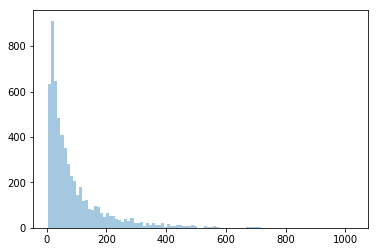

In [14]:
## plot histogram for number of bought items per customer

plt.figure()
sns.distplot(srs_transaction_count.values, bins=100, kde=False)
plt.show()

In [15]:
age_counts = df["age"].value_counts().sort_index()
age_counts

0-17      14707
18-25     97634
26-35    214690
36-45    107499
46-50     44526
51-55     37618
55+       20903
Name: age, dtype: int64

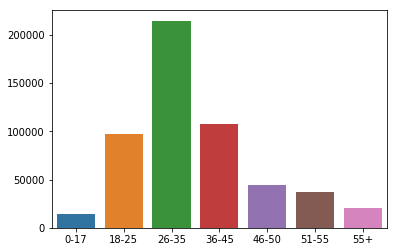

In [16]:
## plot a barplot of the age counts
plt.figure()
sns.barplot(age_counts.index, age_counts.values)
plt.show()

In [17]:
## How many customers were per age group

customer_counts = df.groupby("user_id")["age"].apply(max).value_counts().sort_index()

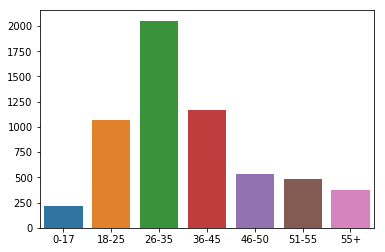

In [18]:
plt.figure()
sns.barplot(customer_counts.index, customer_counts.values)
plt.show()

In [19]:
## How much money did the customers spend per age group

age_spent = df.groupby("age")["purchase"].apply(sum)
age_spent

age
0-17      132659006
18-25     901669280
26-35    1999749106
36-45    1010649565
46-50     413418223
51-55     361908356
55+       197614842
Name: purchase, dtype: int64

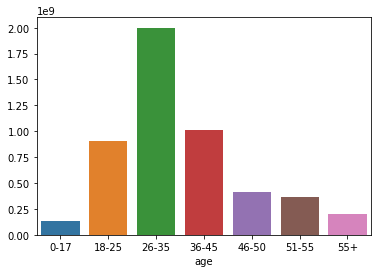

In [20]:
plt.figure()
sns.barplot(age_spent.index, age_spent.values)
plt.show()

In [21]:
age_avg = df.groupby("age")["purchase"].apply(np.mean)
age_avg

age
0-17     9020.126878
18-25    9235.197575
26-35    9314.588970
36-45    9401.478758
46-50    9284.872277
51-55    9620.616620
55+      9453.898579
Name: purchase, dtype: float64

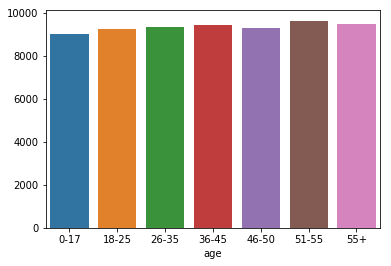

In [22]:
plt.figure()
sns.barplot(age_avg.index, age_avg.values)
plt.show()

In [23]:
## transaction count per city category
city_srs = df["city_category"].value_counts()
city_srs

B    226493
C    166446
A    144638
Name: city_category, dtype: int64

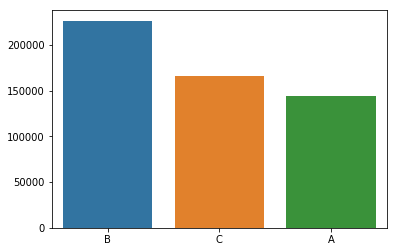

In [24]:
plt.figure()
sns.barplot(city_srs.index, city_srs.values)
plt.show()

In [25]:
srs_purchase_sum = df.groupby("user_id")["purchase"].apply(sum).reset_index()
srs_categories = df.groupby("user_id")[["marital_status", "gender", "age", "city_category", "stay_in_current_city_years" ]].apply(max).reset_index()
df_unique = srs_categories.merge(srs_purchase_sum, on="user_id").sort_values("age")
df_unique.head()

,user_id,marital_status,gender,age,city_category,stay_in_current_city_years,purchase
0,1000001,0,F,0-17,A,2,333481
1873,1001929,0,F,0-17,A,0,112864
4458,1004572,0,F,0-17,C,0,630789
4461,1004575,0,F,0-17,C,2,365760
1872,1001928,0,M,0-17,B,1,1324537


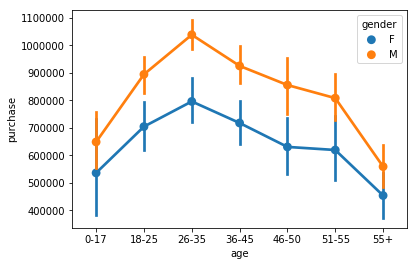

In [26]:
plt.figure()
sns.pointplot(x="age", y="purchase", hue="gender", data=df_unique)
plt.show()

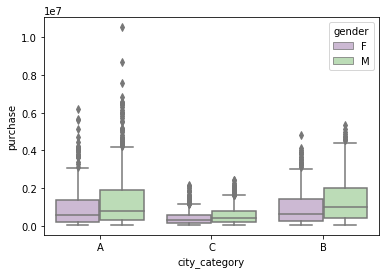

In [27]:
##boxplot of spent money per city category and gender

plt.figure()
sns.boxplot(x="city_category", y="purchase", hue="gender", data=df_unique, palette="PRGn")
plt.show()

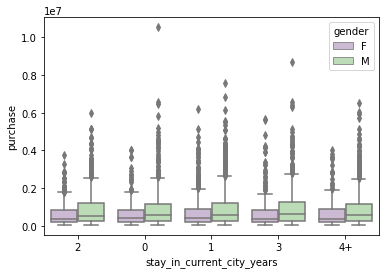

In [28]:
##boxplot of spent money per city category and gender

plt.figure()
sns.boxplot(x="stay_in_current_city_years", y="purchase", hue="gender", data=df_unique, palette="PRGn")
plt.show()

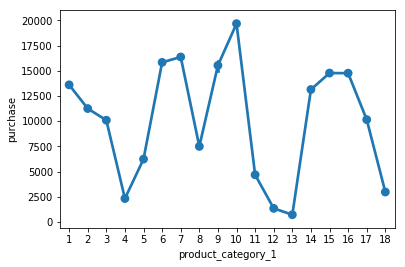

In [29]:
plt.figure()
sns.pointplot(x="product_category_1", y="purchase", data=df, estimator=np.mean)
plt.show()

In [30]:
srs_category_ratio = df.groupby("product_category_1").apply(lambda x: (len(x) / len(df))*100).reset_index()
srs_category_mean = df.groupby("product_category_1")["purchase"].apply(np.mean).reset_index()

df_category_1 = srs_category_ratio.merge(srs_category_mean, on="product_category_1")
df_category_1.columns =["category", "purchase_ratio", "avg_purchase"]
df_category_1.head()

,category,purchase_ratio,avg_purchase
0,1,25.736406,13607.701495
1,2,4.371281,11255.680752
2,3,3.692308,10096.841705
3,4,2.151692,2328.862886
4,5,27.641064,6238.004045


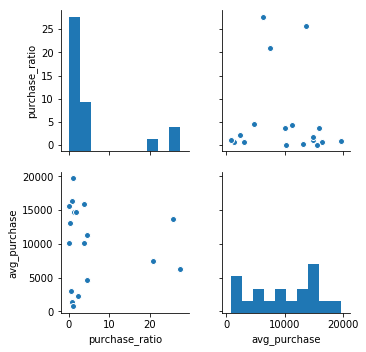

In [31]:
sns.pairplot(df_category_1[["purchase_ratio", "avg_purchase"]])
plt.show()

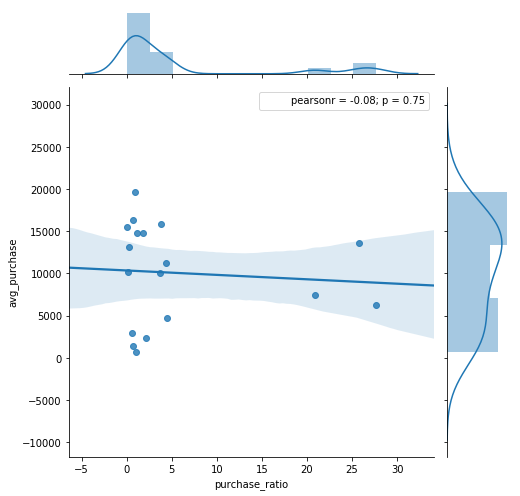

In [32]:
sns.jointplot(x="purchase_ratio", y="avg_purchase", data=df_category_1, kind="reg", size=7)
plt.show()

In [33]:
product_count = df.groupby("product_id").apply(len).reset_index()
product_price = df.groupby("product_id")["purchase"].apply(np.mean).reset_index()

df_product = product_count.merge(product_price, on="product_id")
df_product.columns=["product_id", "purchase_count", "avg_price"]
df_product.head()

,product_id,purchase_count,avg_price
0,P00000142,1130,11143.507080
1,P00000242,371,10552.293801
2,P00000342,238,5299.928571
3,P00000442,92,4795.358696
4,P00000542,146,5419.308219


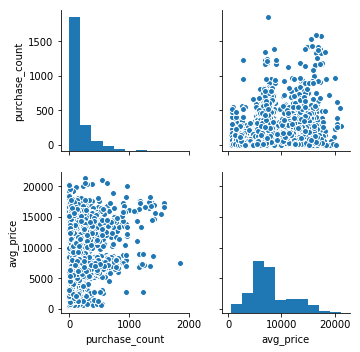

In [34]:
sns.pairplot(df_product[["purchase_count", "avg_price"]])
plt.show()

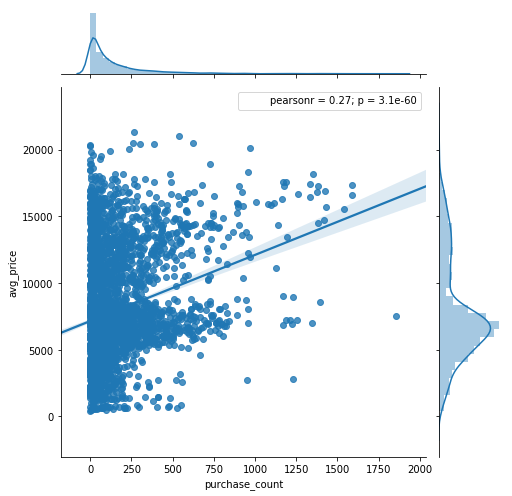

In [35]:
sns.jointplot(x="purchase_count", y="avg_price", data=df_product, kind="reg", size=7)
plt.show()